In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wind_potential = pd.read_csv("data/wind_potential.csv")
coords = pd.read_csv("groups.csv")

notnas = []
for i in range(1, wind_potential.shape[1]):
    if np.sum(wind_potential.iloc[:,i].notna()) != 0:
        notnas.append(i-1)
wind_potential.dropna(axis=1, inplace=True)
coords = coords.iloc[notnas,:]

box = (np.min(coords["long"]), np.max(coords["long"]), np.min(coords["lat"]), np.max(coords["lat"]))
box

(-73.65, -71.85, 41.05, 42.05)

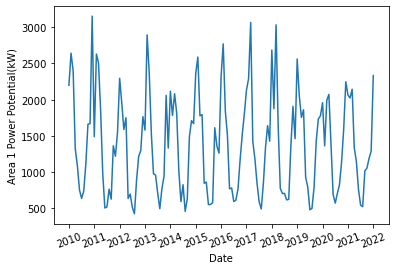

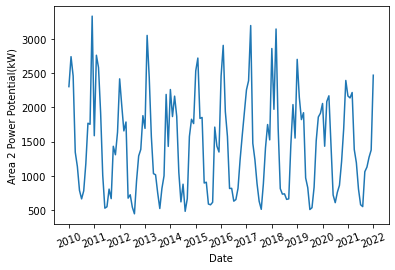

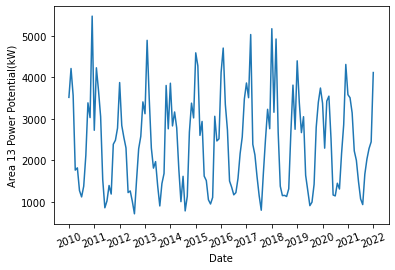

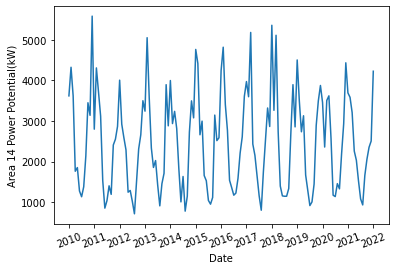

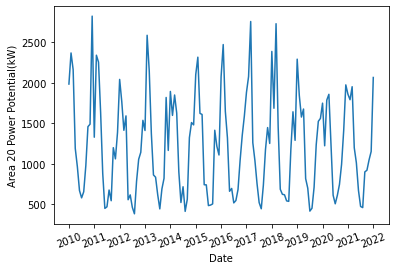

In [3]:
for i in notnas[:5]:    
    lp = sns.lineplot(x="Date", y="Area " + str(i+1) + " Power Potential(kW)", data=wind_potential)
    lp.set_xticks(range(0, wind_potential.shape[0], 12))
    lp.set_xticklabels([s[:4] for s in wind_potential.iloc[range(0, wind_potential.shape[0], 12),0]])
    plt.xticks(rotation=20)
    plt.show()

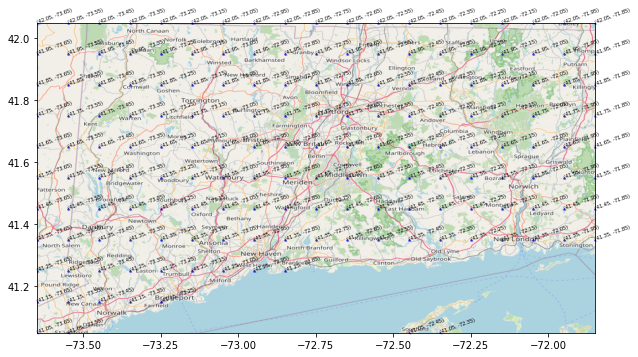

In [17]:
pic = plt.imread("map.png")
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(coords["long"], coords["lat"], zorder=1, alpha= 0.5, c='blue', s=3)
for i in notnas:
    ax.annotate("(" + str(coords["lat"][i]) + ", " + str(coords["long"][i]) + ")", (coords["long"][i], coords["lat"][i]), fontsize=5, rotation=20)
ax.set_xlim(box[0], box[1])
ax.set_ylim(box[2], box[3])
ax.imshow(pic, zorder=0, extent=box, aspect='equal')
plt.savefig("output.png", dpi=300)